<img src= "https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Traitement d'images avec Scipy </h1>
<hr style="border-width:2px;border-color:#75DFC1">

### Contexte et objectif
> Notre prochain objectif consiste à présenter une exploration pratique de l'utilisation de `SciPy` pour le traitement d'images. À travers ce notebook nous démontrerons comment exploiter les fonctionnalités de  `SciPy` pour effectuer diverses opérations de traitement d'images. 
>
> Importons les librairies nécessaires :

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
import pandas as pd
import os
import cv2
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
 

In [3]:
data_img = "C:\\Users\\lenov\\OneDrive\\Bureau\\project_scan_segmentation\\Micro_Organism"

In [4]:
img_path = []
labels = []
img_name = []
path = ["Amoeba", "Euglena", "Hydra", "Paramecium", "Rod_bacteria", "Spherical_bacteria", "Spiral_bacteria", "Yeast"]



for label in path:
    label_path = os.path.join(data_img, label)
    
    for img_file in os.listdir(label_path):
    
        img_path_full = os.path.join(label_path, img_file)
        
        # Ajouter les informations au listes
        img_path.append(img_path_full)
        labels.append(label)
        img_name.append(img_file)


df = pd.DataFrame({"ImagePath": img_path, "Label": labels, "ImageName": img_name})

print(df.head())


                                           ImagePath   Label     ImageName
0  C:\Users\lenov\OneDrive\Bureau\project_scan_se...  Amoeba   Image_1.jpg
1  C:\Users\lenov\OneDrive\Bureau\project_scan_se...  Amoeba  Image_10.jpg
2  C:\Users\lenov\OneDrive\Bureau\project_scan_se...  Amoeba  Image_11.jpg
3  C:\Users\lenov\OneDrive\Bureau\project_scan_se...  Amoeba  Image_14.jpg
4  C:\Users\lenov\OneDrive\Bureau\project_scan_se...  Amoeba  Image_16.jpg


In [52]:
df.Label.value_counts()

Label
Euglena               168
Paramecium            152
Spherical_bacteria     86
Rod_bacteria           85
Hydra                  76
Spiral_bacteria        75
Yeast                  75
Amoeba                 72
Name: count, dtype: int64

In [5]:
df_par = df[df['Label'] == 'Euglena']
df_par.head()

,ImagePath,Label,ImageName
72,C:\Users\lenov\OneDrive\Bureau\project_scan_se...,Euglena,Image_1.jpg
73,C:\Users\lenov\OneDrive\Bureau\project_scan_se...,Euglena,Image_10.jpg
74,C:\Users\lenov\OneDrive\Bureau\project_scan_se...,Euglena,Image_100.jpg
75,C:\Users\lenov\OneDrive\Bureau\project_scan_se...,Euglena,Image_101.jpg
76,C:\Users\lenov\OneDrive\Bureau\project_scan_se...,Euglena,Image_102.jpg


(461, 619, 3)


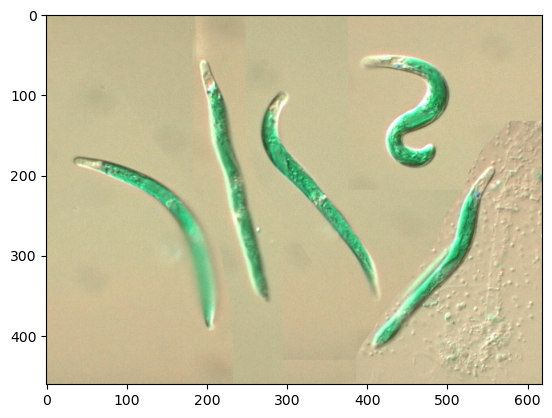

In [6]:
path = df_par.loc[df_par['ImageName'] == 'Image_116.jpg']['ImagePath'].values[0]

img = cv2.imread(path)

print(img.shape)
plt.imshow(img);

> Nous allons travailler avec une démarche de binarisation. 
>
> En vision par ordinateur, la **binarisation** est une technique fondamentale utilisée pour simplifier et traiter les images en les convertissant en **images binaires**, où chaque pixel ne peut prendre que deux valeurs : noir ou blanc, représentant respectivement les régions d'intérêt et le fond. Cette technique est largement utilisée pour segmenter les objets d'intérêt dans une image à partir de leur environnement. Le processus de binarisation implique généralement l'application **d'un seuil à l'image**, où les pixels dont la valeur est supérieure au seuil sont assignés à la classe des pixels d'intérêt, tandis que les pixels dont la valeur est inférieure au seuil sont assignés à la classe du fond. 

Text(0, 0.5, 'Densité')

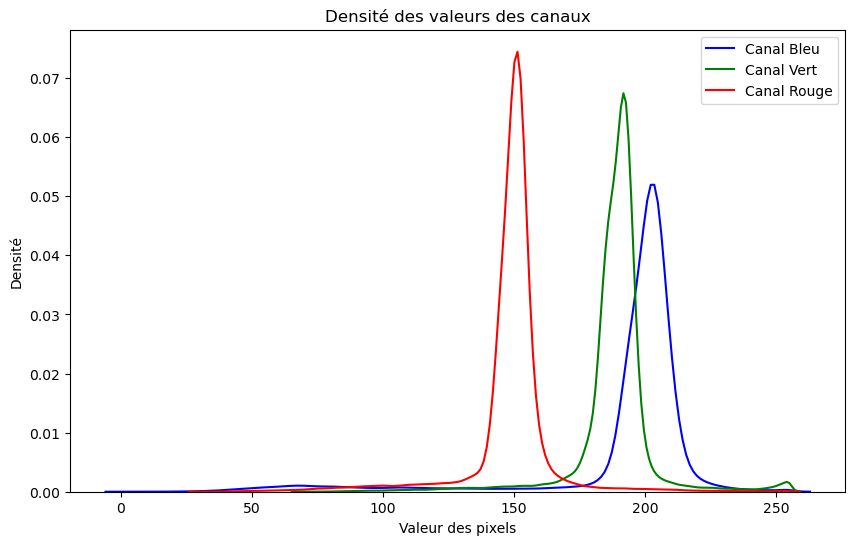

In [7]:

blue_channel = img[:, :, 0]
green_channel = img[:, :, 1]
red_channel = img[:, :, 2]


plt.figure(figsize=(10, 6))


sns.kdeplot(blue_channel.ravel(), color='blue', label='Canal Bleu')
sns.kdeplot(green_channel.ravel(), color='green', label='Canal Vert')
sns.kdeplot(red_channel.ravel(), color='red', label='Canal Rouge')


plt.legend()
plt.title('Densité des valeurs des canaux')
plt.xlabel('Valeur des pixels')
plt.ylabel('Densité')

> Lorsqu'il s'agit de binariser des images en couleur, il y a plusieurs approches possibles. Une méthode courante consiste à binariser chaque canal de couleur individuellement (rouge, vert et bleu dans le cas des images RVB) et à combiner ensuite les résultats pour former une image binaire finale. Cependant, cette approche peut entraîner une perte d'informations spatiales et des incohérences dans la segmentation, car les canaux de couleur peuvent réagir différemment aux variations d'intensité et de luminosité dans l'image.
>
> Une autre approche consiste à convertir l'image couleur dans un espace colorimétrique comme l'espace colorimétrique HSV (Teinte, Saturation, Valeur) ou l'espace colorimétrique LAB (Luminosité, A-B, A-Y) et à binariser ensuite un seul canal qui est le plus approprié pour la tâche de segmentation. Par exemple, dans l'espace colorimétrique HSV, la composante de luminosité (V) peut être un choix judicieux car elle représente l'intensité lumineuse indépendamment de la teinte et de la saturation, ce qui peut aider à maintenir la cohérence de la segmentation.

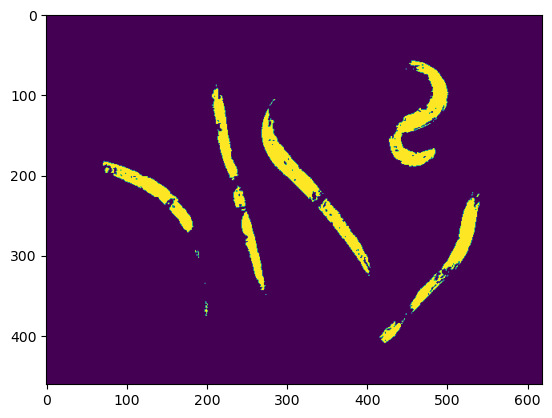

In [11]:
img_b = blue_channel < 100
plt.imshow(img_b);

In [12]:
img_b

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

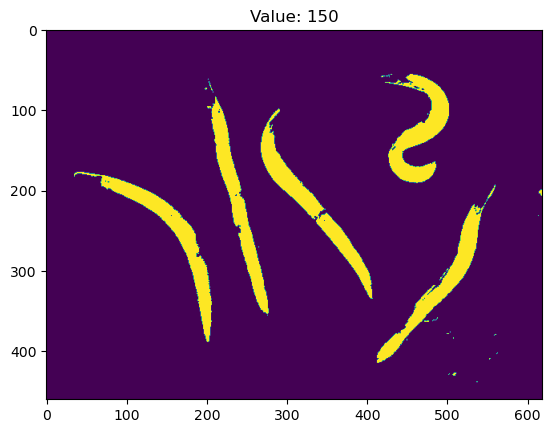

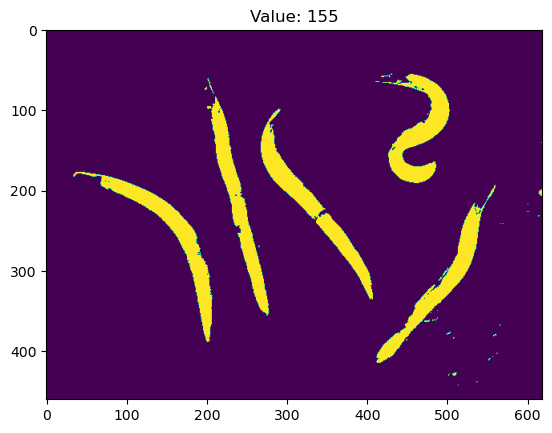

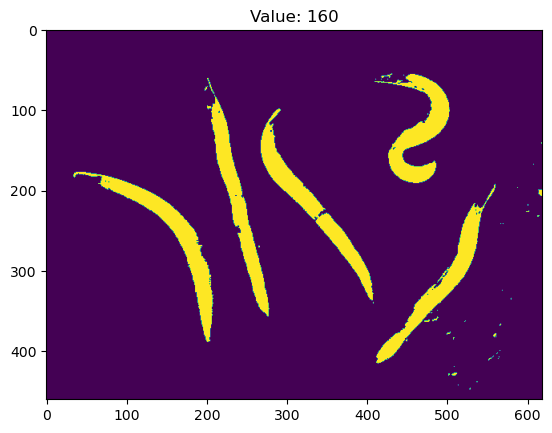

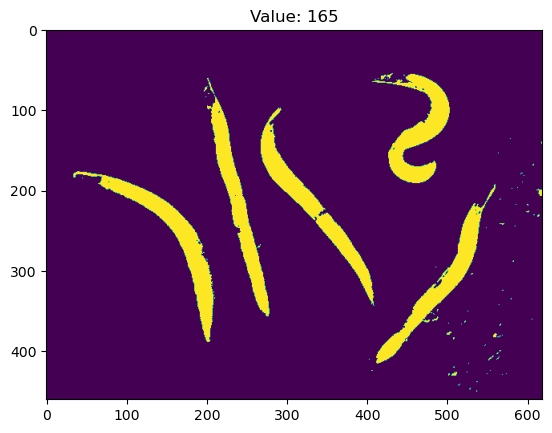

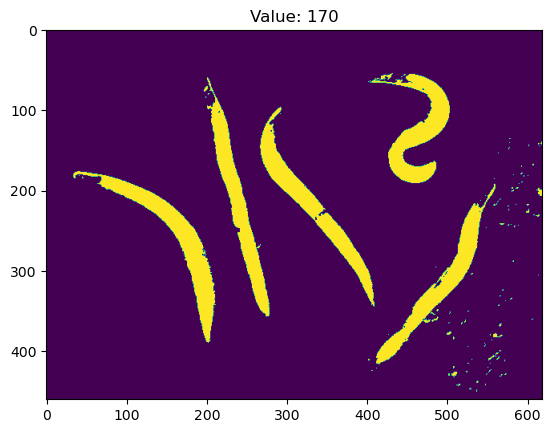

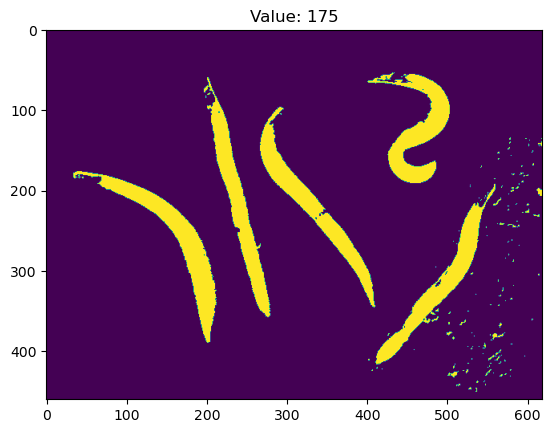

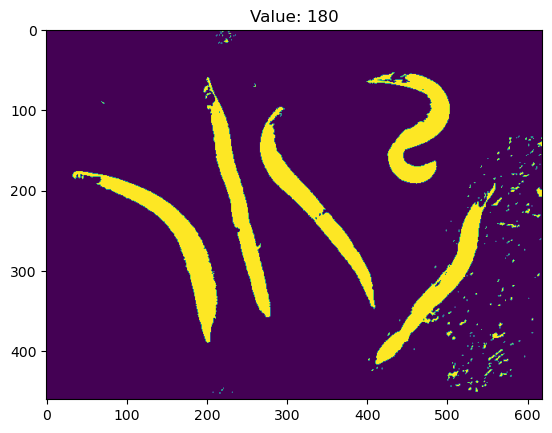

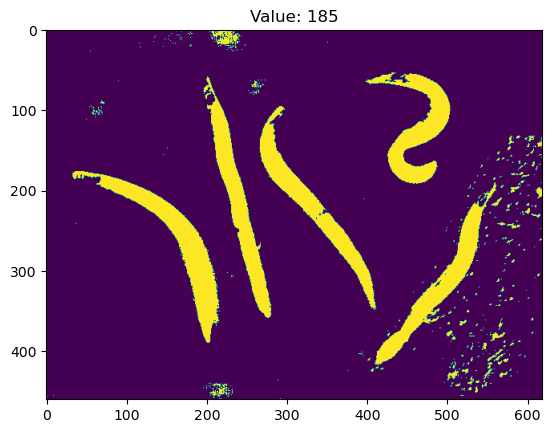

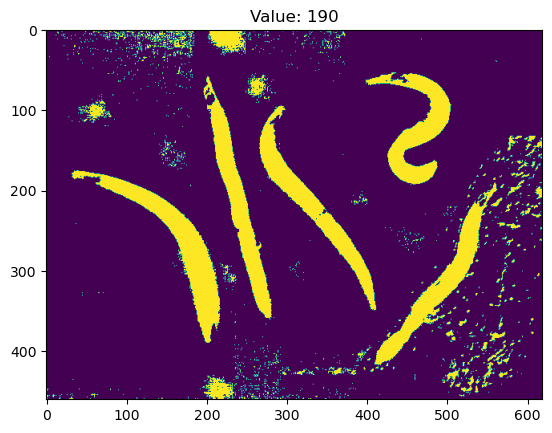

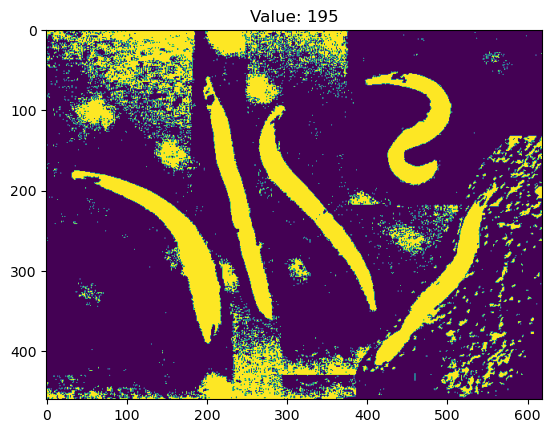

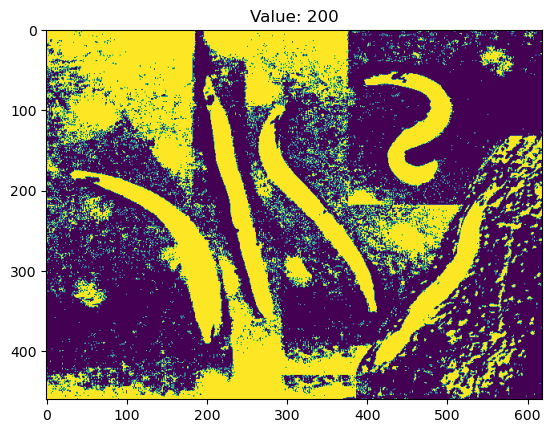

In [13]:
values = np.arange(150, 205, 5)

for i in values:
    img = blue_channel.copy()
    img = img < i
    plt.imshow(img)
    plt.title(f"Value: {i}")
    plt.show()

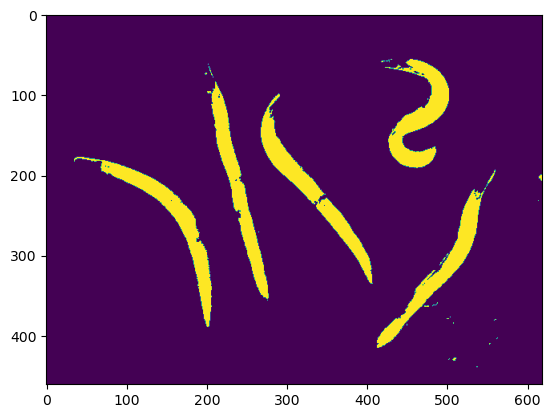

In [63]:
image_2 = blue_channel.copy()
image_2= image_2 < 150
plt.imshow(image_2);

In [38]:
image_2

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

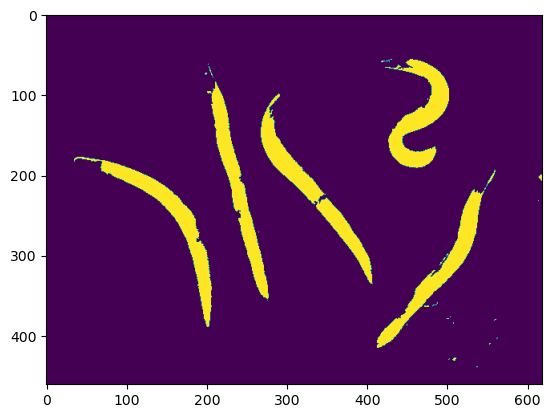

In [64]:
image_2 = ndi.binary_fill_holes(image_2)

plt.imshow(image_2)

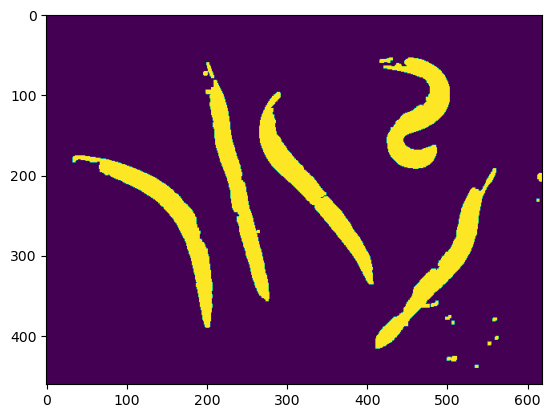

In [68]:
structure = np.array([[0,1,0],
                      [1,1,1],
                     [0,1,0]])

image_2 = ndi.binary_dilation(image_2, structure = structure)
plt.imshow(image_2)

> La fonction `ndi.binary_opening` est utilisée dans le traitement d'images binaires. Plus précisément, elle réalise une opération de morphologie mathématique appelée **"ouverture binaire"**.
>
> L'ouverture binaire consiste en deux étapes :
>
> **Erosion** : Dans cette étape, la fonction cherche les pixels de fond (valeur 0 dans une image binaire) entourés de pixels de premier plan (valeur 1). Elle remplace chaque pixel de fond par la valeur 1 s'il est entouré de pixels de premier plan, sinon elle le laisse inchangé. Cela a pour effet de "rétrécir" les régions de premier plan tout en éliminant les petites "impuretés".
>
> **Dilatation** : Dans cette étape, la fonction dilate l'image résultante de l'érosion. Elle cherche les pixels de premier plan et les étend en remplaçant les pixels de fond adjacents par la valeur 1. Cela a pour effet de "remplir" les trous et de lisser les contours des régions de premier plan.
>
> En combinant ces deux étapes, l'ouverture binaire permet de supprimer les petites saillies et les trous dans les régions de premier plan, tout en préservant leur forme générale.Nous voulons supprimer ainsi des artifacts mais cela va nous faire perdre un peut d'information

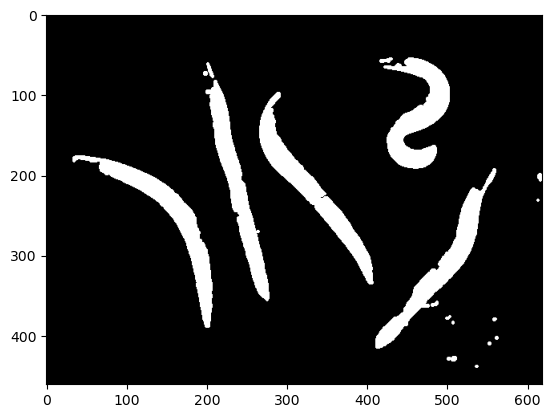

In [69]:
open_image = ndi.binary_opening(image_2)
plt.imshow(open_image, cmap = 'gray');

> L'argument `structure` de la fonction ndi.binary_opening spécifie le voisinage utilisé pour les opérations d'érosion et de dilatation. Plus précisément, il définit la forme du noyau structurant qui est utilisé pour parcourir l'image lors de ces opérations.
>
>Le noyau structurant est une matrice de forme carrée ou rectangulaire qui spécifie les positions relatives des pixels voisins considérés lors de l'érosion et de la dilatation. Pour chaque pixel de l'image, le noyau structurant est centré sur ce pixel, et les opérations d'érosion et de dilatation sont effectuées en examinant les pixels voisins définis par le noyau structurant.
>
> L'argument structure peut être spécifié sous forme de tableau numpy ou de séquence représentant le noyau structurant. Par défaut, si aucun noyau structurant n'est fourni, la fonction utilise un noyau structurant avec un carré de taille 3x3.

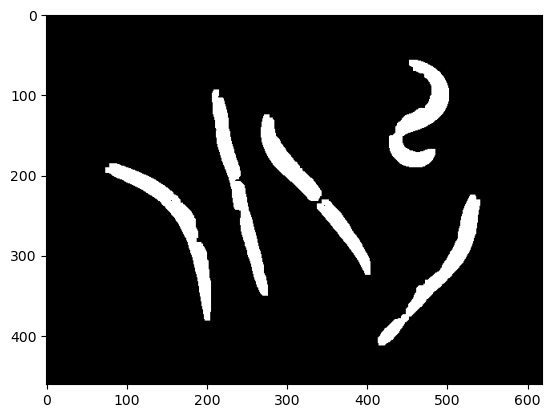

In [28]:
open_image_2 = ndi.binary_opening(open_image, structure=np.ones((7,7)))
plt.imshow(open_image_2, cmap = 'gray');

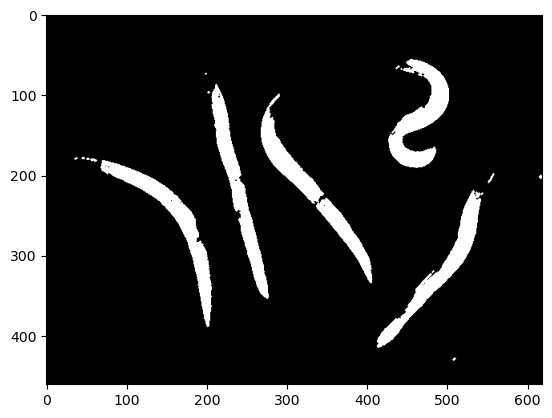

In [32]:
structure = np.array([[0, 1, 0],
                      [1, 1, 1],
                      [0, 1, 0]])

open_image_2 = ndi.binary_opening(open_image, structure=structure)
plt.imshow(open_image_2, cmap = 'gray');

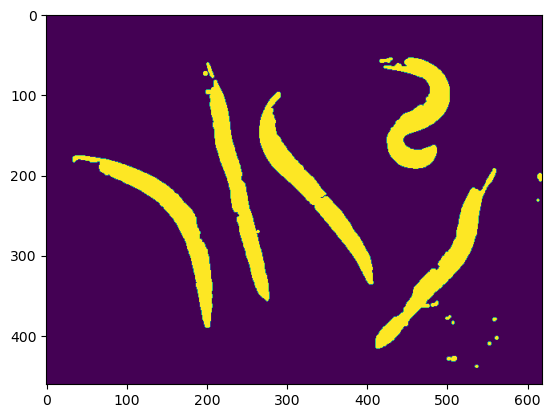

In [70]:
plt.imshow(open_image)

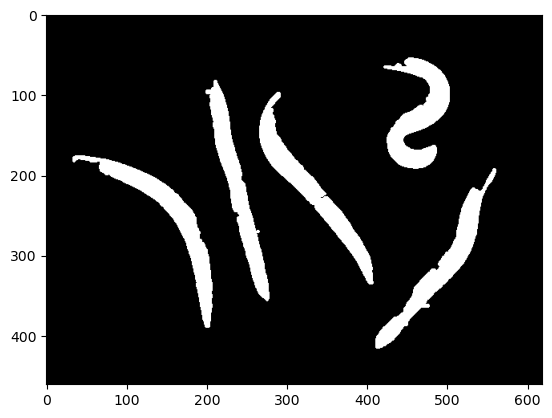

In [71]:
from skimage import morphology

min_size=  300
cleaned_img = morphology.remove_small_objects(open_image, min_size=min_size)
plt.imshow(cleaned_img, cmap = 'gray');

> `label` nous retourne deux variables : l'image labelisée et les labels. 

In [76]:
label_image, n_labels = ndi.label(cleaned_img)
print(f'il y a {n_labels} groupes')

il y a 5 groupes


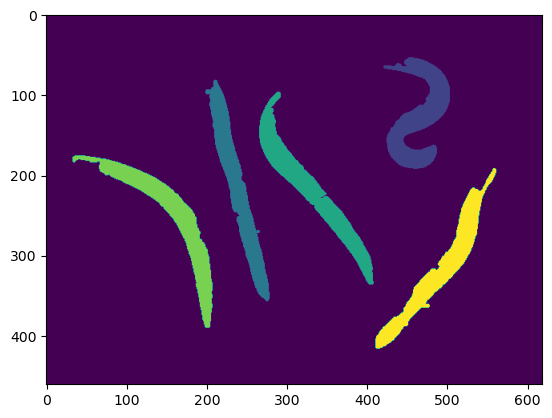

In [73]:
plt.imshow(label_image)

In [77]:
sizes = ndi.sum(img, label_image, range(n_labels + 1))
sizes

array([89397.,  4881.,  5247.,  5717.,  5640.,  5165.])

In [78]:
sizes = sizes[1:]
sizes

array([4881., 5247., 5717., 5640., 5165.])

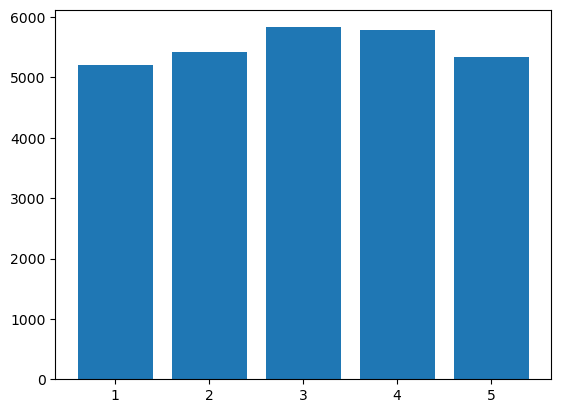

In [84]:
plt.bar(np.arange(1, 6), label_counts);


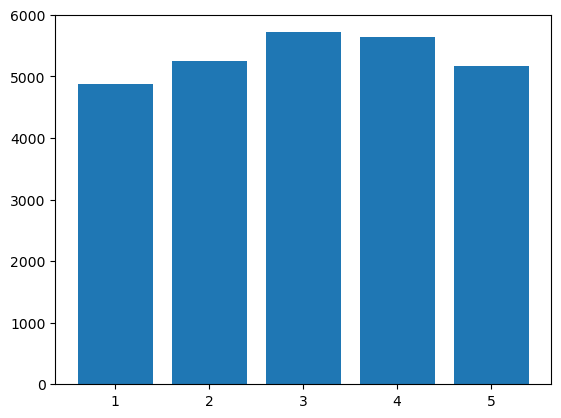

In [85]:
plt.bar(np.arange(1, 6), sizes);

In [ ]:
a = np.arange